<a href="https://colab.research.google.com/github/Swp100/pratica2/blob/main/Introducao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sobre

**Dados**: Rede de Educação do Recife

**Fonte**: http://dados.recife.pe.gov.br/datastore/dump/7c613836-9edd-4c0f-bc72-495008dd29c3?bom=True

**Autor**: Samuel W Paes

**Instituição**: Fatec Votorantim

**Atualização**: 19/10/2024

# Pacotes

In [3]:
import pandas as pd

## Iniciando o ETL (Extract Transforme and load)

### Obtendo os dados

In [9]:
dataframe = pd.read_csv("http://dados.recife.pe.gov.br/dataset/4d3a3b39-9ea9-46ed-bf21-a2670de519c1/resource/7c613836-9edd-4c0f-bc72-495008dd29c3/download/info_escolas_2023_27122023.csv",
                        sep=";", parse_dates=['data_visita'], dayfirst=True)
dataframe.head() # Por defaut, o retorno é os 5 primeiros registros. #NaT é Not a Time
dataframe.head(15) # Os primeiros 15
dataframe.tail(6) # Os últimos 6

,rpa,tipo_cod,tipo,cod_escola,escola,inep,rua,numero,cod_bairro,bairro,...,qtd_professores,escola_climatizada,data_visita,quadra_coberta,quadra_descoberta,biblioteca,sala_recurso,gestor,longitude,latitude
351,6,5,CMEI,545,JESUS DE NAZARE,26153270.0,ANGATUBA,S/N,230,IBURA,...,6,NÂO,NaT,NÃO,NÃO,NÃO,NÃO,JOSEFA MARIA SILVA DE SOUZA,-34.94224,-8.12921
352,6,8,CRECHE ESC.RECIFE,498,CRECHE ESCOLA CRISTO REI,NaN,RUA SERTANIA,200,221,JORDAO,...,0,NÂO,NaT,NÃO,NÃO,NÃO,NÃO,NaN,-34.94507,-8.13546
353,6,8,CRECHE ESC.RECIFE,990,CRECHE ESCOLA RECIFE DO IBURA,26156610.0,EXPEDICIONARIO FRANCISCO VITORIANO,S/N,884,COHAB,...,13,NÂO,NaT,NÃO,NÃO,NÃO,NÃO,ADJANETE LOPES DOS SANTOS,-34.94930,-8.13415
354,6,8,CRECHE ESC.RECIFE,455,GOVERNADOR EDUARDO CAMPOS,26185679.0,VALE DO CARIRI,S/N,884,COHAB,...,7,NÂO,2017-05-04,NÃO,NÃO,NÃO,NÃO,VALERIA ALVARENGA TAUMATURGO SILVA,-34.94860,-8.13199
355,6,8,CRECHE ESC.RECIFE,496,JOSE DE SOUZA FERRAZ,26190567.0,RUA JACUNDA,573,213,IPSEP,...,8,NÂO,NaT,NÃO,NÃO,NÃO,NÃO,BIANCA CHAVES CABRAL,-34.92147,-8.10936
356,6,8,CRECHE ESC.RECIFE,129,SALETE MATIAS BORGES,26191687.0,NaN,S/N,264,IMBIRIBEIRA,...,4,NÂO,NaT,NÃO,NÃO,NÃO,NÃO,MAPHI VASCONCELOS VANDERLEI,NaN,-79.04800


### Removendo as colunas desnecessárias

In [14]:
df = dataframe.drop(['rpa', 'tipo_cod','cod_escola'], axis=1) #axis=1 indica que removeremos as colunas
df.head()

,tipo,escola,inep,rua,numero,cod_bairro,bairro,metragem,qtd_alunos,qtd_turmas,qtd_professores,escola_climatizada,data_visita,quadra_coberta,quadra_descoberta,biblioteca,sala_recurso,gestor,longitude,latitude
0,ESCOLA MUNICIPAL,ALMIRANTE SOARES DUTRA,26120658.0,CAMUTANGA,180,51,CABANGA,"764,3",429,18,13,SIM,2018-02-27,NÃO,NÃO,SIM,SIM,VERONICA MARIA LIMA,-34.89535,-8.07895
1,ESCOLA MUNICIPAL,CIDADAO HERBERT DE SOUZA,26121972.0,ARNOBIO MARQUES,310,108,SANTO AMARO,206,163,12,11,NÂO,NaT,NÃO,NÃO,NÃO,SIM,ANA CLAUDIA DO NASCIMENTO SILVA,-34.88707,-8.04576
2,ESCOLA MUNICIPAL,DO COQUE,26122898.0,MIRANDOPOLIS,35,43,ILHA JOANA BEZERRA,"840,5",622,26,18,NÂO,NaT,NÃO,NÃO,SIM,SIM,GRIJALBA MARIA PESSOA,-34.90022,-8.07145
3,ESCOLA MUNICIPAL,DOS COELHOS,26118670.0,DOS COELHOS,591,60,COELHOS,1322,730,35,24,NÂO,NaT,NÃO,NÃO,SIM,SIM,FRANCISCA ANGELA DA SILVA,-34.89097,-8.06876
4,ESCOLA MUNICIPAL,FREI TADEU GLASER,26175347.0,AGAMENON MAGALHAES,600,108,SANTO AMARO,"398,4",130,8,7,NÂO,2017-04-19,NÃO,NÃO,SIM,SIM,CHRISTIANNE MARIA DOS SANTOS CAVALCANTI,-34.87818,-8.04006


### Visualizando os tipos de dados

In [15]:
df.dtypes #dtypes é uma propriedade e por isso não tem ()

,0
tipo,object
escola,object
inep,float64
rua,object
numero,object
cod_bairro,int64
bairro,object
metragem,object
qtd_alunos,int64
qtd_turmas,int64


### Visualizando apenas a coluna data

In [20]:
df.data_visita
#df.bairro
#df.data_visita.dt.year

,data_visita
0,2018.0
1,NaN
2,NaN
3,NaN
4,2017.0
...,...
352,NaN
353,NaN
354,2017.0
355,NaN


## Análise Descritiva dos Dados

### Medidas de Tendência Central

In [21]:
# Calcular a média da data da visita (pode ser útil para entender a distribuição das visitas ao longo do ano)
df.data_visita.mean()

Timestamp('2017-06-28 09:24:28.800000')

In [22]:
# Calcular a mediana da data de visita
#(pode ser útil para identificar o "meio" das visitas, caso seja assimétrica)
df.data_visita.median()

Timestamp('2017-05-10 00:00:00')

In [25]:
# Obtendo a menor e a maior data.
df['data_visita'].max()
df['data_visita'].min()

Timestamp('2017-02-03 00:00:00')

## Medidas de Dispersão

In [26]:
df.describe() #Visualiza um resumo descritivo de todas as colunas numéricas do Dataframe.

,inep,cod_bairro,qtd_alunos,qtd_turmas,qtd_professores,data_visita,longitude,latitude
count,3.550000e+02,357.000000,357.000000,357.000000,357.000000,125,347.000000,350.000000
mean,2.615151e+07,516.739496,259.913165,13.126050,10.759104,2017-06-28 09:24:28.800000,-35.109663,-8.671441
min,2.611758e+07,19.000000,0.000000,0.000000,0.000000,2017-02-03 00:00:00,-99.999999,-80.614000
25%,2.612556e+07,264.000000,120.000000,7.000000,6.000000,2017-04-17 00:00:00,-34.939600,-8.095582
50%,2.614814e+07,558.000000,217.000000,12.000000,10.000000,2017-05-10 00:00:00,-34.924490,-8.053450
75%,2.616785e+07,736.000000,361.000000,18.000000,14.000000,2017-08-28 00:00:00,-34.904855,-8.018477
max,2.649171e+07,949.000000,879.000000,36.000000,39.000000,2018-04-19 00:00:00,-34.869830,-7.965080
std,4.431212e+04,266.837033,183.339391,7.923321,6.905315,NaN,3.493647,6.602183


### Distribuição de Frequência

In [27]:
df['tipo'].value_counts()

,count
tipo,
ESCOLA MUNICIPAL,260
CRECHE MUNICIPAL,53
CRECHE ESC.RECIFE,28
CMEI,16


<Axes: xlabel='tipo'>

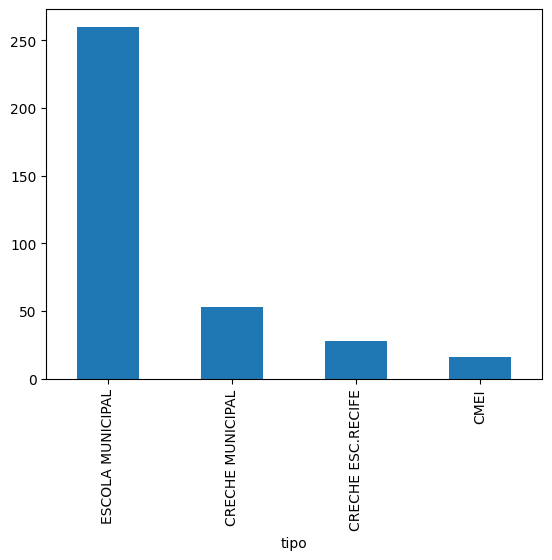

In [28]:
df['tipo'].value_counts().plot(kind='bar')

### Plotando os dados com PyPlot

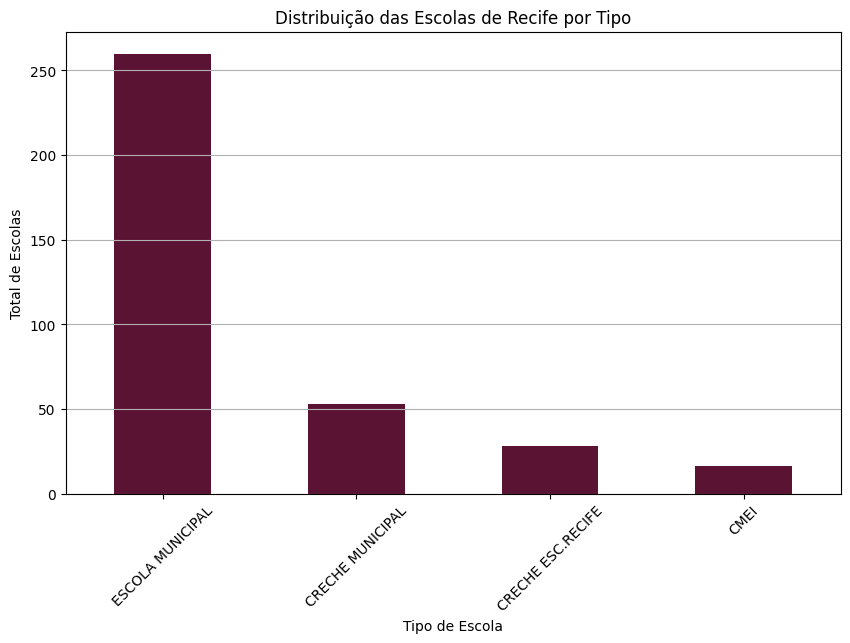

In [42]:
import matplotlib.pyplot as plt

#Contando a frequências dos tipos de escola
contagem_tipos = df.tipo.value_counts()

#Criando o gráfico de barras com personalizações
contagem_tipos.plot(kind='bar', color='#5B1333', figsize=(10,6)) # R- 0 a 255/16 = 15, sobras 15
#Adicionar personalizações com o PyPlot
plt.title('Distribuição das Escolas de Recife por Tipo')
plt.xlabel('Tipo de Escola')
plt.ylabel('Total de Escolas')
plt.xticks(rotation=45) # Rotacionar os rótulos do eixo X
plt.grid(axis='y')
plt.show()

<Axes: title={'center': 'Distribuição das Escolas por Tipo'}, ylabel='count'>

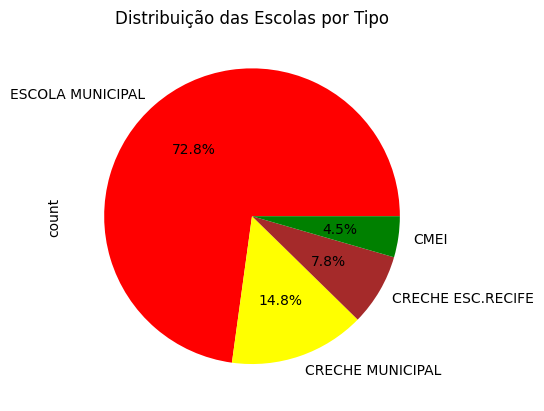

In [44]:
# Criando um gráfico de pizza
df.tipo.value_counts().plot(kind='pie', title='Distribuição das Escolas por Tipo', autopct = '%1.1f%%',
                            colors={'yellow', 'purple','brown', 'red', 'green'})

## Meses com mais visitas

In [47]:
# Identificar as linhas sem data de visita
linhas_com_data_vazia =df.data_visita.isnull()
df_filtrado = df[~linhas_com_data_vazia]
df_filtrado.head()

,tipo,escola,inep,rua,numero,cod_bairro,bairro,metragem,qtd_alunos,qtd_turmas,qtd_professores,escola_climatizada,data_visita,quadra_coberta,quadra_descoberta,biblioteca,sala_recurso,gestor,longitude,latitude
0,ESCOLA MUNICIPAL,ALMIRANTE SOARES DUTRA,26120658.0,CAMUTANGA,180,51,CABANGA,"764,3",429,18,13,SIM,2018-02-27,NÃO,NÃO,SIM,SIM,VERONICA MARIA LIMA,-34.89535,-8.07895
4,ESCOLA MUNICIPAL,FREI TADEU GLASER,26175347.0,AGAMENON MAGALHAES,600,108,SANTO AMARO,"398,4",130,8,7,NÂO,2017-04-19,NÃO,NÃO,SIM,SIM,CHRISTIANNE MARIA DOS SANTOS CAVALCANTI,-34.87818,-8.04006
10,ESCOLA MUNICIPAL,PROFESSOR JOSE DA COSTA PORTO,26121255.0,CABO EUTROPIO,660,43,ILHA JOANA BEZERRA,"1454,4",879,33,30,NÂO,2017-06-06,SIM,NÃO,SIM,SIM,SELME DE FIGUEIROA FARIA,-34.90061,-8.07192
14,ESCOLA MUNICIPAL,SEDE DA SABEDORIA,26122014.0,ARTEMIS,30,108,SANTO AMARO,"1188,8",464,22,17,NÂO,2017-04-19,NÃO,NÃO,SIM,SIM,MARIA DE FATIMA SENA DE ALENCAR,-34.87684,-8.04019
15,ESCOLA MUNICIPAL,SITIO DO CEU,26136269.0,ANCHIETA,85,108,SANTO AMARO,"238,7",195,13,7,SIM,2017-04-19,NÃO,NÃO,NÃO,SIM,VIVIANE CRISTINA DE LIMA FREITAS,-34.88053,-8.04132


In [48]:
media_visita = df_filtrado.data_visita.mean()
media_visita_mes = media_visita.month
print(f"Média dos mês das visitas: {media_visita_mes}")

Média dos mês das visitas: 6


<Axes: title={'center': 'Distribuição Mensal das Visitas'}, ylabel='Frequency'>

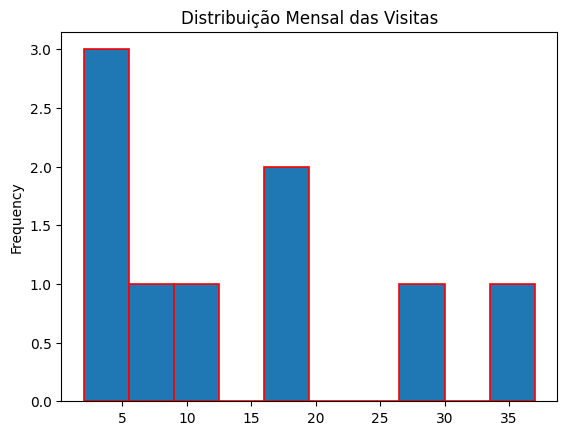

In [54]:
df_filtrado['data_visita'].dt.month.value_counts().plot(kind='hist', title='Distribuição Mensal das Visitas',
                                                        edgecolor='red', linewidth=1.2)

In [55]:
df_filtrado.head()


,tipo,escola,inep,rua,numero,cod_bairro,bairro,metragem,qtd_alunos,qtd_turmas,qtd_professores,escola_climatizada,data_visita,quadra_coberta,quadra_descoberta,biblioteca,sala_recurso,gestor,longitude,latitude
0,ESCOLA MUNICIPAL,ALMIRANTE SOARES DUTRA,26120658.0,CAMUTANGA,180,51,CABANGA,"764,3",429,18,13,SIM,2018-02-27,NÃO,NÃO,SIM,SIM,VERONICA MARIA LIMA,-34.89535,-8.07895
4,ESCOLA MUNICIPAL,FREI TADEU GLASER,26175347.0,AGAMENON MAGALHAES,600,108,SANTO AMARO,"398,4",130,8,7,NÂO,2017-04-19,NÃO,NÃO,SIM,SIM,CHRISTIANNE MARIA DOS SANTOS CAVALCANTI,-34.87818,-8.04006
10,ESCOLA MUNICIPAL,PROFESSOR JOSE DA COSTA PORTO,26121255.0,CABO EUTROPIO,660,43,ILHA JOANA BEZERRA,"1454,4",879,33,30,NÂO,2017-06-06,SIM,NÃO,SIM,SIM,SELME DE FIGUEIROA FARIA,-34.90061,-8.07192
14,ESCOLA MUNICIPAL,SEDE DA SABEDORIA,26122014.0,ARTEMIS,30,108,SANTO AMARO,"1188,8",464,22,17,NÂO,2017-04-19,NÃO,NÃO,SIM,SIM,MARIA DE FATIMA SENA DE ALENCAR,-34.87684,-8.04019
15,ESCOLA MUNICIPAL,SITIO DO CEU,26136269.0,ANCHIETA,85,108,SANTO AMARO,"238,7",195,13,7,SIM,2017-04-19,NÃO,NÃO,NÃO,SIM,VIVIANE CRISTINA DE LIMA FREITAS,-34.88053,-8.04132


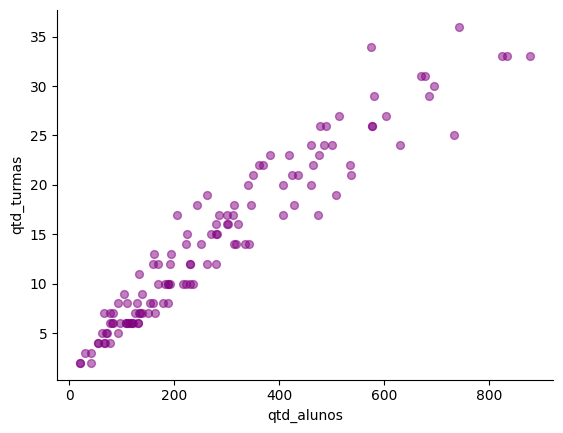

In [65]:
# @title qtd_alunos vs qtd_turmas

from matplotlib import pyplot as plt
df_filtrado.plot(kind='scatter', x='qtd_alunos', y='qtd_turmas', s=32, alpha=.5, c='purple')
#s = size ou tamanho da bolinha, alpha é a transparência de 0 a 1
plt.gca().spines[['top', 'right',]].set_visible(False)